In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# 1. Load the data into the pandas environment and identify some basic details of the dataset.

In [106]:
emp=pd.read_csv('employee.csv')
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


# 2. Reset the index as "name".

In [107]:
emp.set_index('name', inplace=True)
emp

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 3. Select rows for specific names Jack Morgan and Josh wills.

In [79]:
emp.loc[['Jack Morgan', 'Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4. Select data for multiple values "Sales" and “Finance”.

In [80]:
emp[emp['department'].isin(['Sales','Finance'])]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 5. Display employee who has more than 700 performance score.

In [81]:
high_perfo=emp[emp['performance_score']>700]
high_perfo.loc[:,['performance_score']]

,performance_score
name,
Allen Smith,723
Dheeraj Patel,711
Josh Wills,901
Leo Duck,709


# 6. Display employee who has more than 500 and less than 700 performance score

In [82]:
avg_perfo=emp[(emp['performance_score']>500) &  (emp['performance_score']<700)]
avg_perfo.loc[:,['performance_score']]

,performance_score
name,
S Kumar,520
Jack Morgan,674
Ying Chin,556
Satyam Sharma,649


# 7. Check and handle missing values in the dataset

In [83]:
emp.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

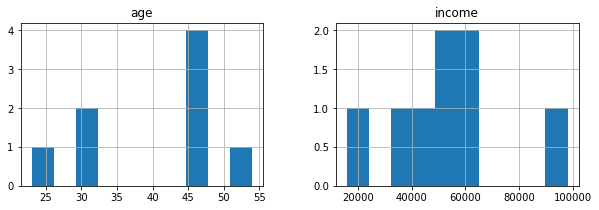

In [76]:
freqgraph = emp.select_dtypes(include=['float'])
freqgraph.hist(figsize=(10,3))
plt.show()

In [47]:
# Since they are not normally distributed, we can replace the missing values with the median

In [112]:
for i in ['age', 'income']:
    emp[i]=emp[i].fillna(emp[i].median())
emp

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,38.5,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,38.5,62000.0,F,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [48]:
#Since 'gender' is not numerical, we can replace the missing values with mode 

In [111]:
emp['gender']=emp['gender'].fillna(emp['gender'].mode()[0])
emp

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,F,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,F,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [86]:
emp.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

# 8. Check the outliers and handle outliers in performance score using Percentiles.

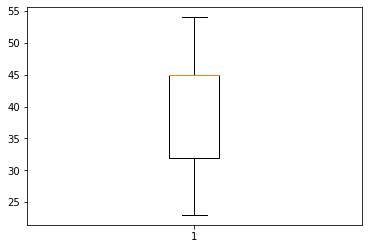

In [87]:
plt.boxplot(emp[['age']])
plt.show()

In [54]:
#No outlier in age

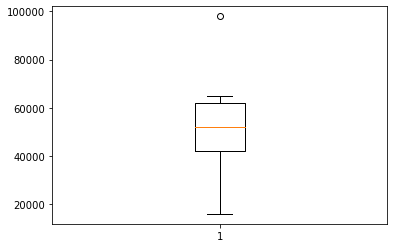

In [88]:
plt.boxplot(emp[['income']])
plt.show()

In [55]:
#There is an outlier in income

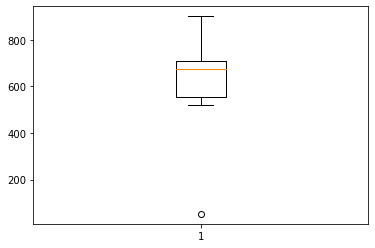

In [89]:
plt.boxplot(emp[['performance_score']])
plt.show()

In [56]:
#There is an outier in performance_score

In [58]:
#Finding Outliers and dropping them

In [90]:
Q1 = np.percentile(emp['performance_score'],25,interpolation = 'midpoint')
Q2 = np.percentile(emp['performance_score'],50,interpolation = 'midpoint')
Q3 = np.percentile(emp['performance_score'],75,interpolation = 'midpoint')

IQR = Q3-Q1
low_lim = Q1 - (1.5*IQR)
up_lim = Q3 + (1.5*IQR)

print("IQR is ",IQR)
print("Lower limit is" ,low_lim)
print("Upper Limit is",up_lim)

IQR is  155.0
Lower limit is 323.5
Upper Limit is 943.5


In [91]:
outlier = []
for x in emp['performance_score']:
    if ((x < low_lim) or (x > up_lim)):
        outlier.append(x)
print("Outlier values are",outlier)

Outlier values are [53]


In [108]:
ind1 = emp['performance_score']<low_lim
emp.loc[ind1].index

Index(['James Authur'], dtype='object', name='name')

In [109]:
emp.drop(['James Authur'], inplace=True)

In [113]:
emp

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,38.5,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,38.5,62000.0,F,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 9. Check the gender column and do Dummy encoding.

In [114]:
emp["gender"].nunique()

2

In [115]:
pd.get_dummies(emp['gender'])

,F,M
name,,
Allen Smith,1,0
S Kumar,1,0
Jack Morgan,0,1
Ying Chin,1,0
Dheeraj Patel,1,0
Satyam Sharma,1,0
Josh Wills,1,0
Leo Duck,0,1


# 10.Do the standard scaling on the feature performance score.

In [116]:
emp['performance_score'].describe()

count      8.00000
mean     680.37500
std      116.16729
min      520.00000
25%      625.75000
50%      691.50000
75%      714.00000
max      901.00000
Name: performance_score, dtype: float64